In [1]:
import torch
import torchaudio
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import sys
sys.path.append('../')
from data_lib import MusicDeepFakeDataset, model_labels, train_set, test_files
import params
import utils

REPO_ROOT = '/home/navin/repos/FakeMusicCaps'
FIGURES_DIR = os.path.join(REPO_ROOT, 'figures')



## Balance of classes

In [2]:
from params import PARENT_DIR

fakemusiccaps_dir = os.path.join(PARENT_DIR, 'data', 'FakeMusicCaps')

# List all subdirectories in FakeMusicCaps
main_subdirs = [d for d in os.listdir(fakemusiccaps_dir) if os.path.isdir(os.path.join(fakemusiccaps_dir, d))]

for main_dir in main_subdirs:
    print(f"\n{main_dir}/")
    main_path = os.path.join(fakemusiccaps_dir, main_dir)
    
    # Count WAV files in this directory
    wav_files = len([f for f in os.listdir(main_path) if f.endswith('.wav')])
    if wav_files > 0:
        print(f"  WAV files in root: {wav_files}")
    
    # List subdirectories and their WAV files
    subdirs = [d for d in os.listdir(main_path) if os.path.isdir(os.path.join(main_path, d))]
    for subdir in subdirs:
        subdir_path = os.path.join(main_path, subdir)
        num_files = len([f for f in os.listdir(subdir_path) if f.endswith('.wav')])
        print(f"  {subdir}/: {num_files} wav files")


MusicCaps/
  WAV files in root: 5373

SunoCaps/
  WAV files in root: 63

musicldm/
  WAV files in root: 5521

mustango/
  WAV files in root: 5521

MusicGen_medium/
  WAV files in root: 5521

stable_audio_open/
  WAV files in root: 5521

audioldm2/
  WAV files in root: 5521


## Visualize raw audio waveforms of each class

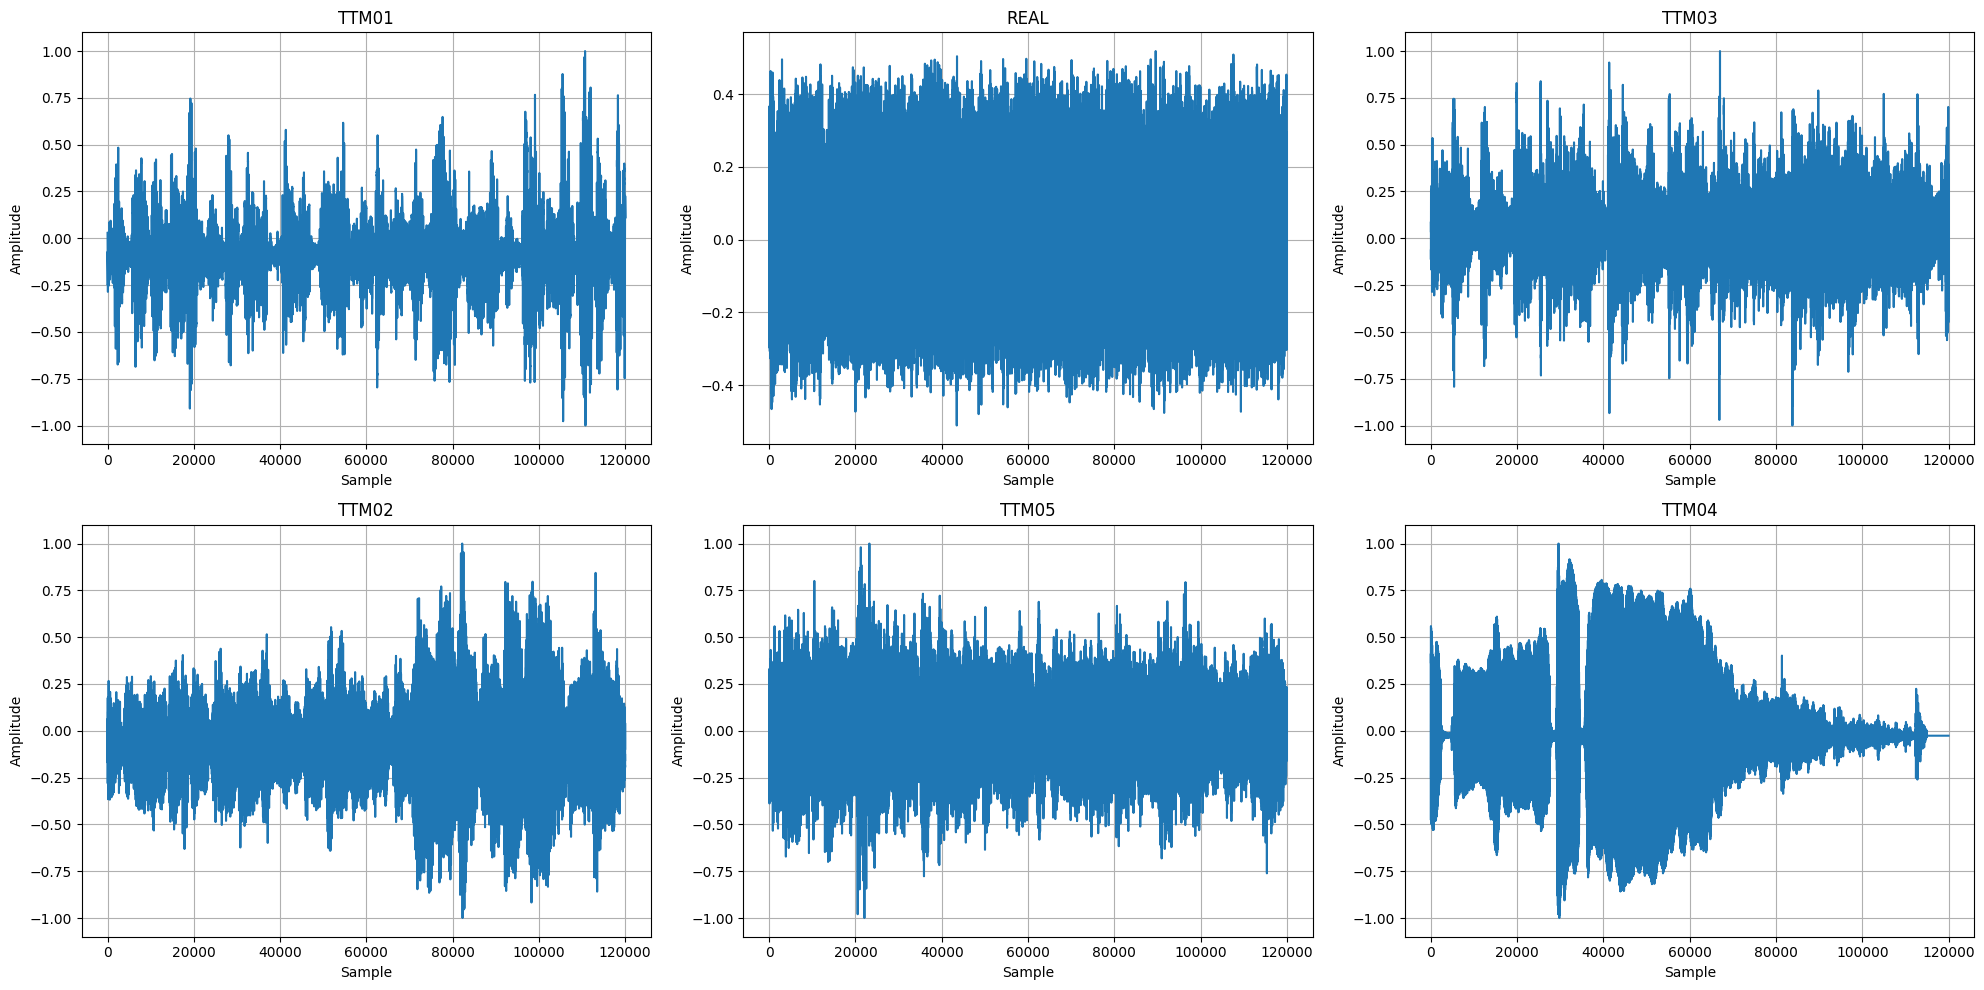

In [3]:
# Create dataset for raw audio
raw_dataset = MusicDeepFakeDataset(train_set, model_labels, 7.5, feat_type='raw')

# Get one example from each class
classes = ['REAL', 'TTM01', 'TTM02', 'TTM03', 'TTM04', 'TTM05']
examples = {}

for i, (data, label) in enumerate(raw_dataset):
    class_idx = int(label.item())
    class_name = classes[class_idx]
    if class_name not in examples:
        examples[class_name] = data
    if len(examples) == len(classes):
        break

# Plot waveforms in a grid
plt.figure(figsize=(20, 10))
for i, (class_name, wave) in enumerate(examples.items(), 1):
    plt.subplot(2, 3, i)
    plt.plot(wave.squeeze())
    plt.title(f"{class_name}")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.grid(True)

plt.tight_layout()
plt.show()

## Visualize log spectrograms of each class

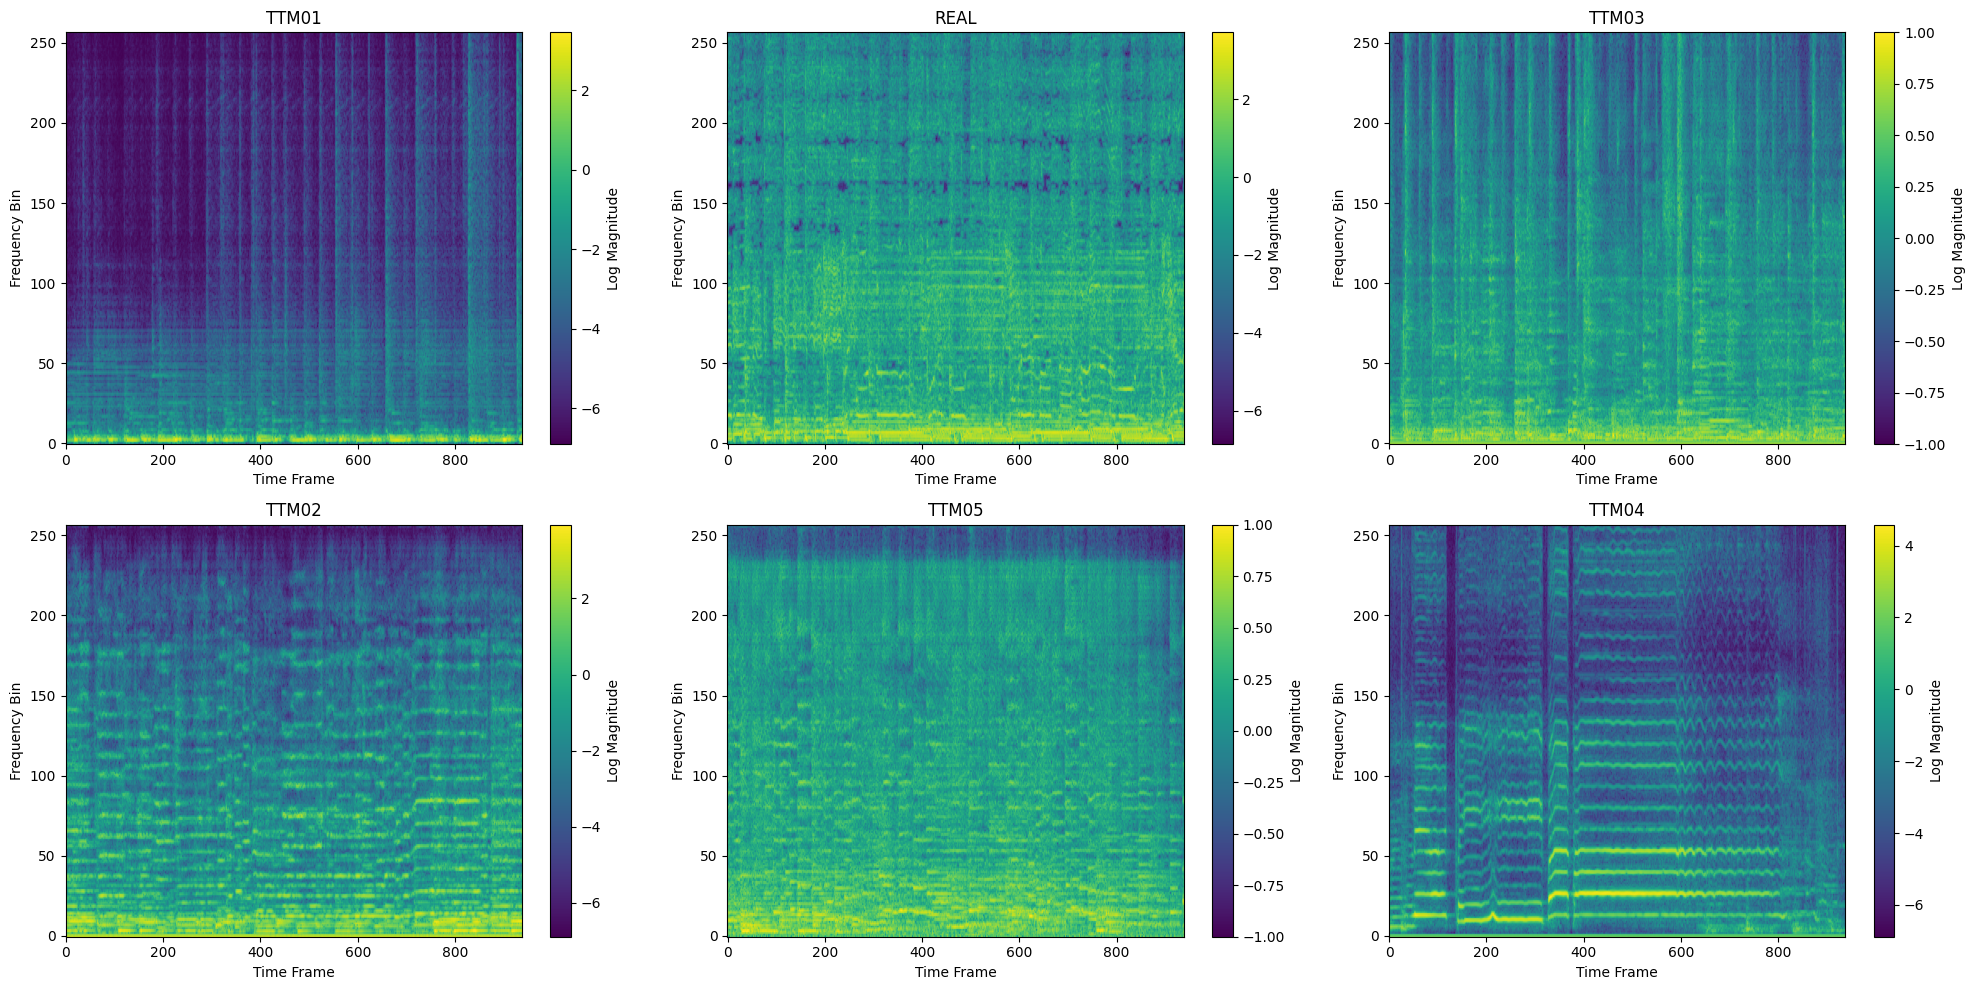

Spectrogram shape: torch.Size([1, 257, 938])


In [4]:
# Create dataset for spectrograms
freq_dataset = MusicDeepFakeDataset(train_set, model_labels, 7.5, feat_type='freq')

# Get one example from each class
classes = ['REAL', 'TTM01', 'TTM02', 'TTM03', 'TTM04', 'TTM05']
examples = {}

for i, (data, label) in enumerate(freq_dataset):
    class_idx = int(label.item())  # Convert float to int
    class_name = classes[class_idx]
    if class_name not in examples:
        examples[class_name] = data
    if len(examples) == len(classes):
        break

# Plot spectrograms
plt.figure(figsize=(20, 10))
for i, (class_name, spec) in enumerate(examples.items(), 1):
    plt.subplot(2, 3, i)
    plt.title(f'{class_name}')
    plt.imshow(spec.squeeze(), aspect='auto', origin='lower')
    plt.colorbar(label='Log Magnitude')
    plt.xlabel('Time Frame')
    plt.ylabel('Frequency Bin')

plt.tight_layout()
plt.show()

# Print shapes for reference
print("Spectrogram shape:", spec.shape)

## Results: confusion matrices for open and closed threshold set of SpecResNet 7.5s model

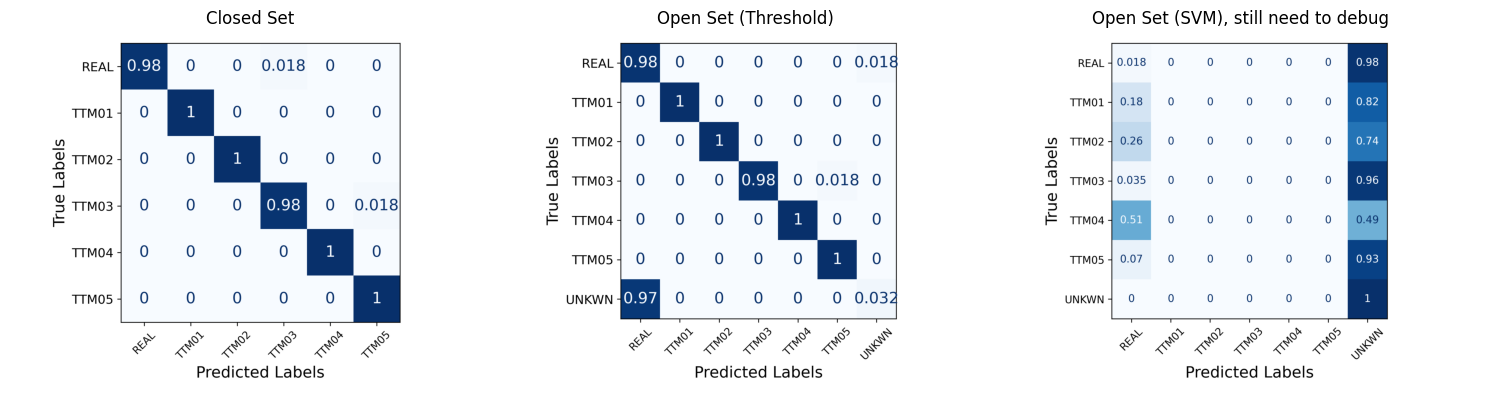

In [6]:
# Load confusion matrix PNGs
cm_closed = mpimg.imread(os.path.join(FIGURES_DIR, 'cm_closed_set_SpecResNet_7.5_sec.png'))
cm_thresh = mpimg.imread(os.path.join(FIGURES_DIR, 'cm_open_set_thresh_SpecResNet_7.5_sec.png'))
cm_svm = mpimg.imread(os.path.join(FIGURES_DIR, 'cm_open_set_svm_SpecResNet_7.5_sec.png'))

# Display them
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(cm_closed)
plt.title('Closed Set')
plt.axis('off')

plt.subplot(132)
plt.imshow(cm_thresh)
plt.title('Open Set (Threshold)')
plt.axis('off')

plt.subplot(133)
plt.imshow(cm_svm)
plt.title('Open Set (SVM), still need to debug')
plt.axis('off')

plt.tight_layout()
plt.show()

## Final Accuracy Metrics:

| Classification | ACC_B | Precision | Recall | F1 Score |
|----------------|-------|-----------|---------|-----------|
| Closed | 0.99 | 0.99 | 0.99 | 0.99 |
| Open (Threshold) | 0.86 | 0.87 | 0.86 | 0.81 |
| Open (SVM) | 0.15 | nan | 0.15 | 0.05 |